In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf


def create_df(dataset):
    image_paths, labels = [], []

    for dirpath, dirnames, filenames in os.walk(dataset):
        for filename in filenames:
            image = os.path.join(dirpath, filename)
            image_paths.append(image)

            if 'all' in dirpath: 
                labels.append('all')
            else:
                labels.append('hem')

    df = pd.DataFrame({'Image Path': image_paths, 'Label': labels})
    return df

train_dir = r"C:\Users\taher farh\Downloads\C-NMC_Leukemia\training_data"
df = create_df(train_dir)

from sklearn.model_selection import train_test_split
train_df, remaining_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=31, stratify=df['Label'])
valid_df, test_df = train_test_split(remaining_df, train_size=0.5, shuffle=True, random_state=31, stratify=remaining_df['Label'])


batch_size = 40
train_data_generator = ImageDataGenerator(horizontal_flip=True, rescale=1./255)  
valid_data_generator = ImageDataGenerator(rescale=1./255)  

train_gen = train_data_generator.flow_from_dataframe(train_df, x_col='Image Path', y_col='Label', target_size=(224, 224), class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
valid_gen = valid_data_generator.flow_from_dataframe(valid_df, x_col='Image Path', y_col='Label', target_size=(224, 224), class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
test_gen = valid_data_generator.flow_from_dataframe(test_df, x_col='Image Path', y_col='Label', target_size=(224, 224), class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_gen, validation_data=valid_gen, epochs=20)

Found 7462 validated image filenames belonging to 2 classes.
Found 1599 validated image filenames belonging to 2 classes.
Found 1600 validated image filenames belonging to 2 classes.


C:\Users\taher farh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\taher farh\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


187/187 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.7554 - loss: 0.6321 - val_accuracy: 0.7974 - val_loss: 0.4661
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 187s 998ms/step - accuracy: 0.8082 - loss: 0.4395 - val_accuracy: 0.7936 - val_loss: 0.4673
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 180s 961ms/step - accuracy: 0.8170 - loss: 0.4299 - val_accuracy: 0.8243 - val_loss: 0.4309
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 176s 938ms/step - accuracy: 0.8450 - loss: 0.3810 - val_accuracy: 0.8405 - val_loss: 0.4098
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 174s 929ms/step - accuracy: 0.8482 - loss: 0.3660 - val_accuracy: 0.8386 - val_loss: 0.4120
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 175s 933ms/step - accuracy: 0.8538 - loss: 0.3457 - val_accuracy: 0.7936 - val_loss: 0.4824
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 175s 934ms/step - accuracy: 0.8744 - loss: 0.3066 - val_accuracy: 0.8474 - val_loss: 0.3927
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 176s 938ms/step - accuracy: 0.8749 - loss: 0.2967 

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step


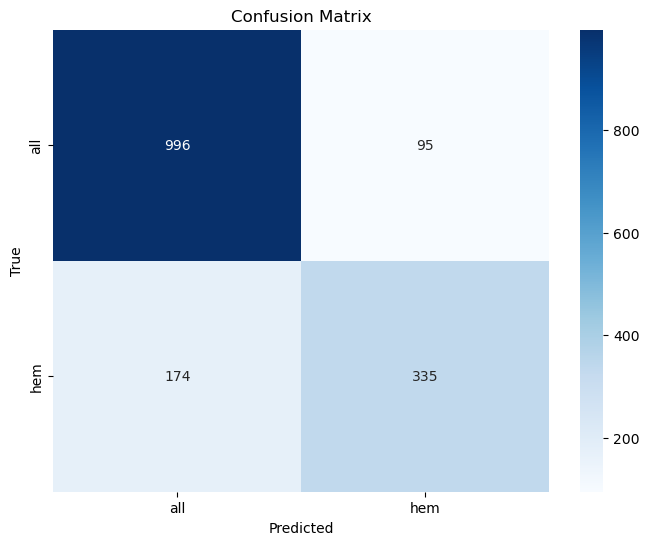

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, test_gen):
    y_true = test_gen.classes
    y_pred = model.predict(test_gen)
    y_pred_labels = np.argmax(y_pred, axis=1)
    
    cm = confusion_matrix(y_true, y_pred_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


plot_confusion_matrix(model, test_gen)


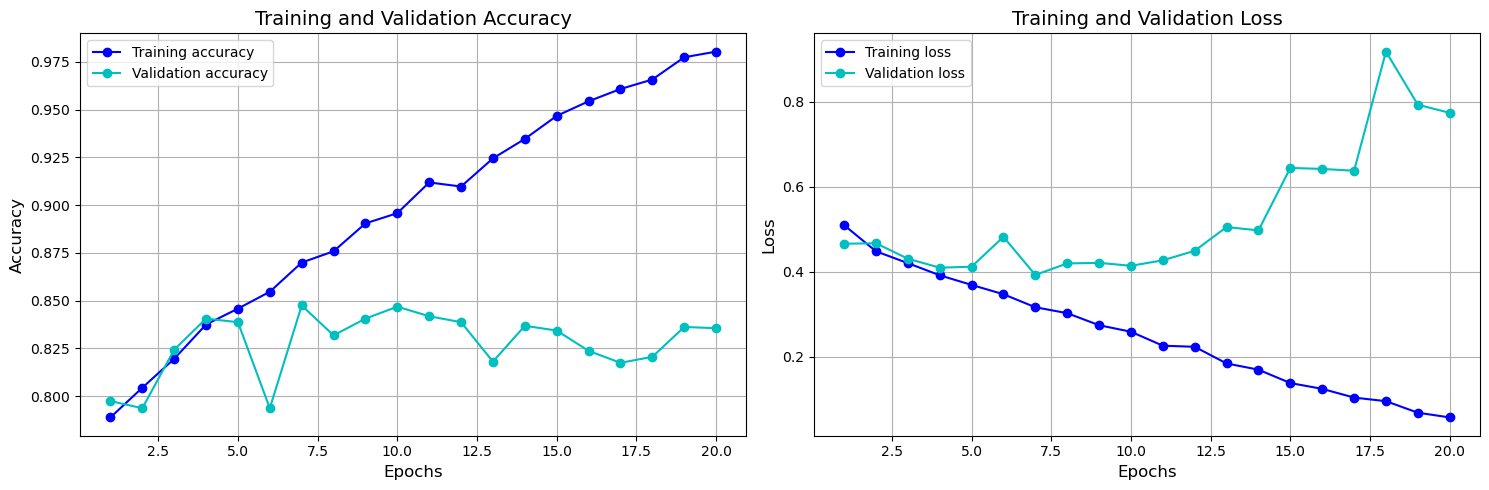

40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.8249 - loss: 0.7943
Test loss: 0.7291610836982727
Test accuracy: 0.8318750262260437


In [2]:
# Function to show training history plot
def show_history_plot(history):
    training_accuracy = history['accuracy']
    epochs = range(1, len(training_accuracy) + 1)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)  
    plt.plot(epochs, history['accuracy'], 'b', label='Training accuracy', marker='o')
    plt.plot(epochs, history['val_accuracy'], 'c', label='Validation accuracy', marker='o')
    plt.title('Training and Validation Accuracy', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)  
    plt.plot(epochs, history['loss'], 'b', label='Training loss', marker='o')
    plt.plot(epochs, history['val_loss'], 'c', label='Validation loss', marker='o')
    plt.title('Training and Validation Loss', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


show_history_plot(history.history)

# Evaluate the model on the test data
test_score = model.evaluate(test_gen, steps=test_gen.n // test_gen.batch_size, verbose=1)
print(f"Test loss: {test_score[0]}")
print(f"Test accuracy: {test_score[1]}")

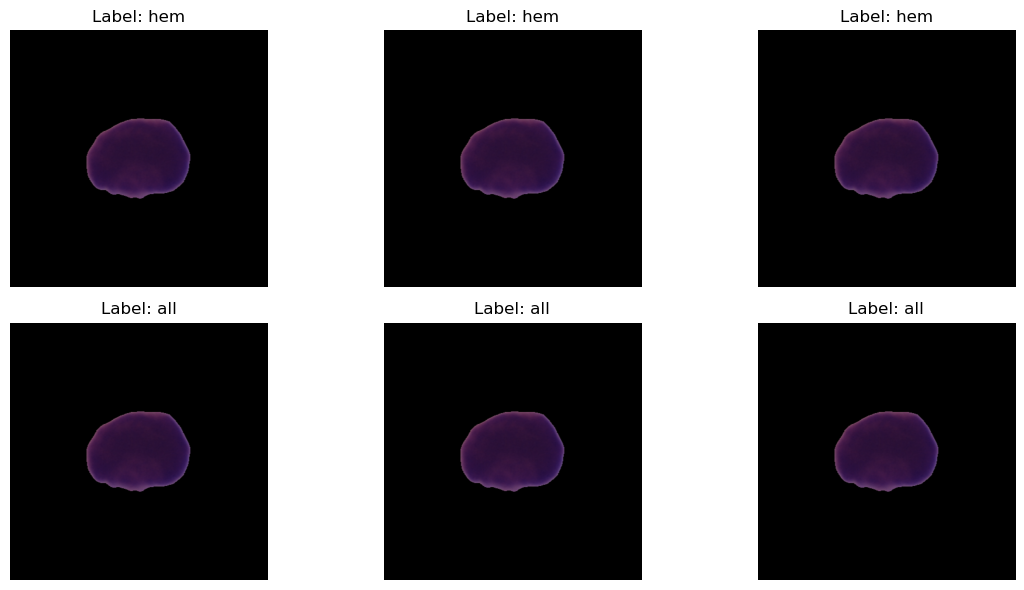

In [3]:
import pandas as pd
import matplotlib.pyplot as plt



if 'Label' in train_df.columns:
    # Sample the images for 'hem' and 'all' labels
    hem_img = train_df[train_df['Label'] == 'hem'].sample(3)
    all_img = train_df[train_df['Label'] == 'all'].sample(3)
    
    sampled_df = pd.concat([hem_img, all_img])
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
   
    for idx, (image_path, ax) in enumerate(zip(sampled_df['Image Path'], axes.flat)):
       
        image_path = r"C:\Users\taher farh\Downloads\C-NMC_Leukemia\training_data\fold_0\all\UID_5_3_2_all.bmp"  
        img = plt.imread(image_path)  
        ax.imshow(img)  
        ax.set_title(f"Label: {sampled_df['Label'].iloc[idx]}")  # Set the title as the label
        ax.axis('off')  

    plt.tight_layout()
    plt.show()
else:
    print("Column 'Label' is missing from train_df. Please check the DataFrame.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: hem


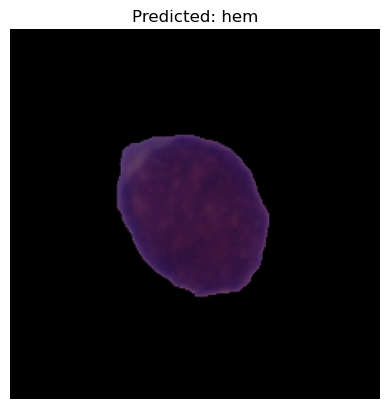

In [20]:
def predict_image(image_path, model):
   
    img = load_img(image_path, target_size=(224, 224))  
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  

    
    img_array = img_array / 255.0

 
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)


    label_dict = {1: 'hem', 0: 'all'}
    predicted_label = label_dict[predicted_class[0]]
  
    print(f"Predicted class: {predicted_label}")

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


image_path = r"C:\Users\taher farh\Downloads\C-NMC_Leukemia\training_data\fold_2\hem\UID_h3_3_1_hem.bmp"  # Provide the path to the image you want to classify
predict_image(image_path, model)


In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the ResNet50 model pre-trained on ImageNet, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
base_model.trainable = False

# Create the custom classification model
model = models.Sequential([
    base_model,  # Add the pre-trained ResNet50 base model
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 classes: 'hem' and 'all'
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Data generators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Assuming you have DataFrames `train_df` and `valid_df` with columns 'Image Path' and 'Label'
train_gen = train_datagen.flow_from_dataframe(train_df, x_col='Image Path', y_col='Label', target_size=(224, 224), class_mode='categorical', batch_size=32)
valid_gen = valid_datagen.flow_from_dataframe(valid_df, x_col='Image Path', y_col='Label', target_size=(224, 224), class_mode='categorical', batch_size=32)

# Train the model
history = model.fit(train_gen, epochs=10, validation_data=valid_gen)

# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(valid_gen)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step
Found 7462 validated image filenames belonging to 2 classes.
Found 1599 validated image filenames belonging to 2 classes.
Epoch 1/10


C:\Users\taher farh\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


234/234 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.6292 - loss: 0.7303 - val_accuracy: 0.6823 - val_loss: 0.6290
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 386s 2s/step - accuracy: 0.6813 - loss: 0.6257 - val_accuracy: 0.6823 - val_loss: 0.6162
Epoch 3/10
 19/234 ━━━━━━━━━━━━━━━━━━━━ 4:53 1s/step - accuracy: 0.6269 - loss: 0.6492

KeyboardInterrupt: 